In [1]:
import pandas as pd
import numpy as np

In [2]:


url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'


df =  pd.read_csv(url, header = None, usecols = [0,1,2])

df.columns = ['Label', 'Alcohol', 'MalicAcid']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Label      178 non-null    int64  
 1   Alcohol    178 non-null    float64
 2   MalicAcid  178 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.3 KB


In [3]:
df.head()

,Label,Alcohol,MalicAcid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


Standardization and Min-Max Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [6]:
standard_scale = StandardScaler()
df_stdScale = standard_scale.fit_transform(df[['Alcohol', 'MalicAcid']])
df_stdScale[:5]

array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377]])

In [7]:
minmax_scale = MinMaxScaler()
df_minmax = minmax_scale.fit_transform(df[['Alcohol', 'MalicAcid']])
df_minmax[:5]

array([[0.84210526, 0.1916996 ],
       [0.57105263, 0.2055336 ],
       [0.56052632, 0.3201581 ],
       [0.87894737, 0.23913043],
       [0.58157895, 0.36561265]])

In [8]:
print(f"The mean of Standard Scaling: {np.mean(df_stdScale):.2f}")
print(f"The Standard Deviation of Standard Scaling: {np.std(df_stdScale):.2f}")

The mean of Standard Scaling: -0.00
The Standard Deviation of Standard Scaling: 1.00


In [9]:
print(f"The min of Min-Max Scaling: {df_minmax.min():.2f}")
print(f"The max of Min-Max Scaling: {df_minmax.max():.2f}")
print(f"The mean of Min-Max Scaling: {np.mean(df_minmax):.2f}")
print(f"The Standard Deviation of Min-Max Scaling: {np.std(df_minmax):.2f}")

The min of Min-Max Scaling: 0.00
The max of Min-Max Scaling: 1.00
The mean of Min-Max Scaling: 0.42
The Standard Deviation of Min-Max Scaling: 0.24


In [12]:
%matplotlib inline

from matplotlib import pyplot as plt

def plot():
  plt.figure(figsize=(8,6))
  plt.scatter(df['Alcohol'], df['MalicAcid'],
              color= 'green', label = 'Input Scale', alpha=0.5)

  plt.scatter(df_stdScale[:,0], df_stdScale[:,1],
              color = 'red', label = 'Standardized [mean = 0, std = 1]', alpha= 0.3)

  plt.scatter(df_minmax[:,0], df_minmax[:,1], label='min-max scaled [min = 0, max = 1]', alpha = 0.3)

  plt.title('Alcohol and Malic Acid content of the wine dataset')
  plt.xlabel('Alcohol')
  plt.ylabel('Malic Acid')
  plt.legend(loc='upper left')
  plt.grid()
  plt.tight_layout()



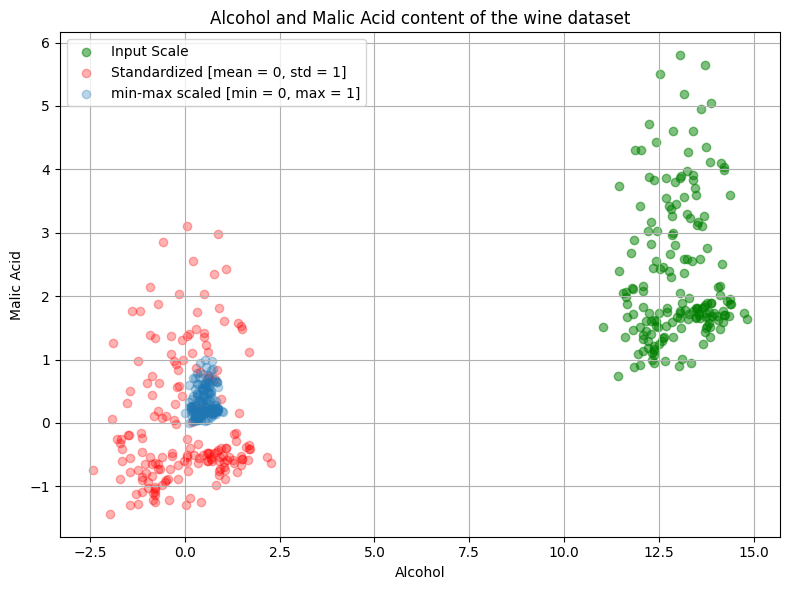

In [13]:
plot()
plt.show()

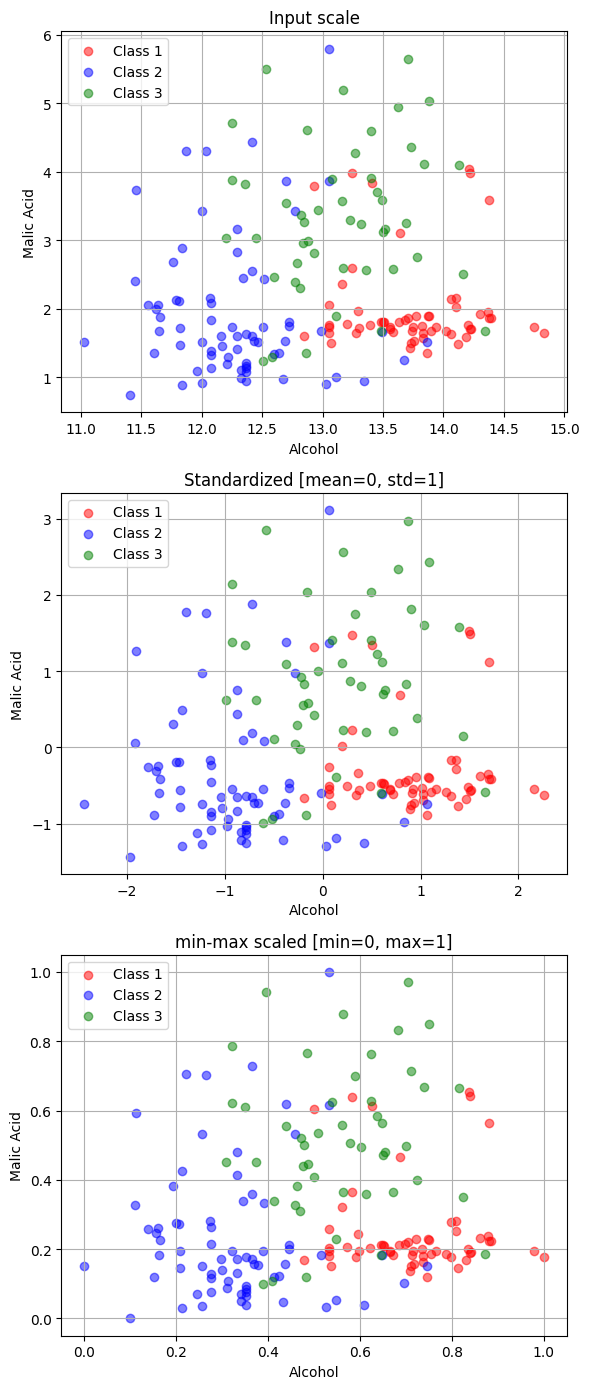

In [14]:
fig, ax = plt.subplots(3, figsize=(6,14))

for a,d,l in zip(range(len(ax)),
               (df[['Alcohol', 'MalicAcid']].values, df_stdScale, df_minmax),
               ('Input scale',
                'Standardized [mean=0, std=1]',
                'min-max scaled [min=0, max=1]')
                ):
    for i,c in zip(range(1,4), ('red', 'blue', 'green')):
        ax[a].scatter(d[df['Label'].values == i, 0],
                  d[df['Label'].values == i, 1],
                  alpha=0.5,
                  color=c,
                  label='Class %s' %i
                  )
    ax[a].set_title(l)
    ax[a].set_xlabel('Alcohol')
    ax[a].set_ylabel('Malic Acid')
    ax[a].legend(loc='upper left')
    ax[a].grid()

plt.tight_layout()
plt.show()